In [40]:
from bloqade import qasm2
import numpy as np
from bloqade.pyqrack import PyQrack
from collections import Counter
from bloqade.qasm2.rewrite.native_gates import RydbergGateSetRewriteRule
from kirin import ir
from kirin.rewrite import Walk
from bloqade.qasm2.passes import UOpToParallel, QASM2Fold
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append(r'C:\Users\victo\OneDrive\Documents\GitHub\yquantum\2025YaleQHack\src\TimeIndepSpinChain')
from TimeIndepSpinChain import (
    SpinChainLieTrotter, SpinChainLieTrotterParallel, SpinChainSuzukiTrotter
)

ImportError: cannot import name 'SpinChainLieTrotterParallel' from 'TimeIndepSpinChain' (C:\Users\victo\OneDrive\Documents\GitHub\yquantum\2025YaleQHack\src\TimeIndepSpinChain\TimeIndepSpinChain.py)

# O(n^2) Trotterization

In [ ]:
time_interval = 0.5
steps = 24
N = 3
mag_vals = [] 

for i in range(steps):
    kernel_PT = SpinChainLieTrotter(N, time_interval*i, i)
    
    device = PyQrack(dynamic_qubits=True, pyqrack_options={"isBinaryDecisionTree": False})
    results = device.multi_run(kernel_PT, _shots=100)
    
    def to_bitstrings(results):
        return Counter(map(lambda result:"".join(map(str, result)), results))
    
    counts = to_bitstrings(results)
    
    total_magnetization = 0
    
    for key, value in counts.items():
        spin_down = str(key).count('1')
        total_magnetization += value*spin_down * (-1) + value*(2**N - spin_down)

    print("Time " + str(time_interval*i) + ": " + str(total_magnetization/100))
    mag_vals.append(total_magnetization/100) 



Time 0.0: 8.0
Time 0.5: 2.4
Time 1.0: -5.1
Time 1.5: -6.7
Time 2.0: 0.58
Time 2.5: 6.4
Time 3.0: 3.9
Time 3.5: -2.5
Time 4.0: -4.64
Time 4.5: -0.82
Time 5.0: 1.92
Time 5.5: 3.2
Time 6.0: -0.14
Time 6.5: -2.88
Time 7.0: -0.92
Time 7.5: 0.94
Time 8.0: 1.58
Time 8.5: 0.68
Time 9.0: 0.4
Time 9.5: -1.44
Time 10.0: -0.52
Time 10.5: 0.06
Time 11.0: -0.76
Time 11.5: -0.06


In [ ]:
target = qasm2.emit.QASM2(allow_parallel=True)
ast = target.emit(SpinChainLieTrotterParallel(2,12,24))
qasm2.parse.pprint(ast)

KeyboardInterrupt: 

In [26]:
noNoise8QLie = np.array([8.0,2.4,-5.1,-6.7,0.58,6.4,3.9,-2.5,-4.64,-0.82,1.92,3.2,-0.14,-2.88,-0.92,0.94,1.58,0.68,0.4,-1.44,-0.52,0.06,-0.76,-0.06])

In [ ]:
plt.figure(figsize=(10, 4))
t = np.linspace(0, (steps-1)*time_interval, 48)
noNoise8QLie = np.array(mag_vals)
plt.plot(t, noNoise8QLie, marker="x", c="darkmagenta", ls="dashed", lw=0.8)
plt.xlabel("Time (a.u.)")
plt.ylabel(r"$\langle M \rangle$")
plt.title("1D Ising chain magnetization over time on Bloqade (8 qubits, no noise, O(t^2))") 

# Better Trotterization

#### Test on 4 Qubits

In [ ]:
time_interval = 0.5
steps = 24
N = 2
mag_vals = [] 

for i in range(steps):
    kernel_PT = SpinChainSuzukiTrotter(N, time_interval*i, i)
    
    device = PyQrack(dynamic_qubits=True, pyqrack_options={"isBinaryDecisionTree": False})
    results = device.multi_run(kernel_PT, _shots=100)
    
    def to_bitstrings(results):
        return Counter(map(lambda result:"".join(map(str, result)), results))
    
    counts = to_bitstrings(results)
    
    total_magnetization = 0
    
    for key, value in counts.items():
        spin_down = str(key).count('1')
        total_magnetization += value*spin_down * (-1/2) + value*(2**N - spin_down) * (1/2)

    print("Time " + str(time_interval*i) + ": " + str(total_magnetization/100))
    mag_vals.append(total_magnetization/100) 

In [ ]:
plt.figure(figsize=(10, 4))
t = np.linspace(0, (steps-1)*time_interval, 24)
noNoise8QSukuzi = np.array(mag_vals)
plt.plot(t, noNoise8QSukuzi, marker="x", c="darkmagenta", ls="dashed", lw=0.8)
plt.xlabel("Time (a.u.)")
plt.ylabel(r"$\langle M \rangle$")
plt.title("1D Ising chain magnetization over time on Bloqade (4 qubits, no noise, O(t^3))") 

In [5]:
time_interval = 0.5
steps = 24
N = 3
mag_vals = [] 

for i in range(steps):
    kernel_PT = SpinChainSuzukiTrotter(N, time_interval*i, i)
    
    device = PyQrack(dynamic_qubits=True, pyqrack_options={"isBinaryDecisionTree": False})
    results = device.multi_run(kernel_PT, _shots=100)
    
    def to_bitstrings(results):
        return Counter(map(lambda result:"".join(map(str, result)), results))
    
    counts = to_bitstrings(results)
    
    total_magnetization = 0
    
    for key, value in counts.items():
        spin_down = str(key).count('1')
        total_magnetization += value*spin_down * (-1/2) + value*(2**N - spin_down) * (1/2)

    print("Time " + str(time_interval*i) + ": " + str(total_magnetization/100))
    mag_vals.append(total_magnetization/100) 

Time 0.0: 4.0
Time 0.5: 1.53
Time 1.0: -2.68
Time 1.5: -3.54
Time 2.0: 0.15
Time 2.5: 3.03
Time 3.0: 1.86
Time 3.5: -0.59
Time 4.0: -2.35
Time 4.5: -0.63
Time 5.0: 1.23
Time 5.5: 1.71
Time 6.0: 0.28
Time 6.5: -1.34
Time 7.0: -0.73
Time 7.5: -0.55
Time 8.0: 0.37
Time 8.5: 0.07
Time 9.0: -0.27
Time 9.5: -0.6
Time 10.0: 0.08
Time 10.5: 0.49
Time 11.0: 0.66
Time 11.5: -0.22


In [25]:
noNoise8QSukuzi = 2*np.array([4.0,1.53,-2.68,-3.54,0.15,3.03,1.86,-0.59,-2.35,-0.63,1.23,1.71,0.28,-1.34,-0.73,-0.55,0.37,0.07,-0.27,-0.6,0.08,0.49,0.66,-0.22])

Text(0.5, 1.0, '1D Ising chain magnetization over time on Bloqade (8 qubits, no noise, O(t^3))')

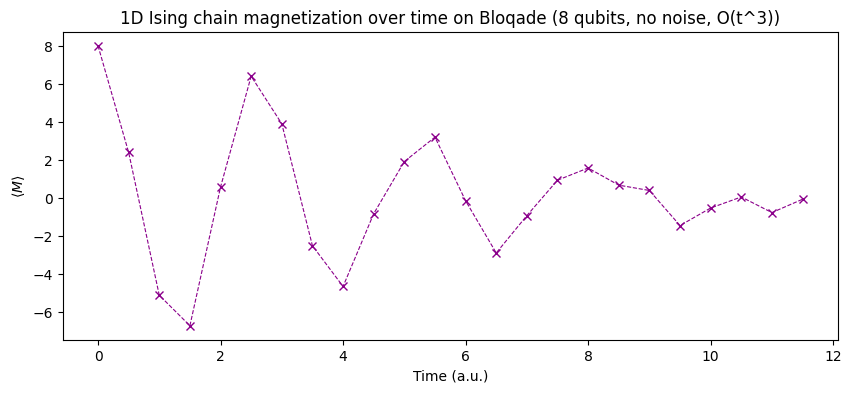

In [ ]:
plt.figure(figsize=(10, 4))
t = np.linspace(0, (steps-1)*time_interval, 24)
plt.plot(t, noNoise8QSukuzi, marker="x", c="darkmagenta", ls="dashed", lw=0.8)
plt.xlabel("Time (a.u.)")
plt.ylabel(r"$\langle M \rangle$")
plt.title("1D Ising chain magnetization over time on Bloqade (8 qubits, no noise, O(t^3))") 



In [32]:
plt.figure(figsize=(10, 4))
t = np.linspace(0, (steps-1)*time_interval, 24)
plt.plot(t, noNoise8QSukuzi, marker="x", c="darkmagenta", ls="dashed", lw=0.8, label="O(t^3) Trotterization")
plt.plot(t, noNoise8QLie, marker="x", c="green", ls="dashed", lw=0.8, label="O(t^2) Trotterization")
plt.xlabel("Time (a.u.)")
plt.ylabel(r"$\langle M \rangle$")
plt.title("Trotterization comparison: 1D Ising chain magnetization over time on Bloqade (8 qubits, no noise)") 
plt.plot(t,np.zeros(24))
plt.legend()


[ 8.    2.4  -5.1  -6.7   0.58  6.4   3.9  -2.5  -4.64 -0.82  1.92  3.2
 -0.14 -2.88 -0.92  0.94  1.58  0.68  0.4  -1.44 -0.52  0.06 -0.76 -0.06]
[ 8.    2.4  -5.1  -6.7   0.58  6.4   3.9  -2.5  -4.64 -0.82  1.92  3.2
 -0.14 -2.88 -0.92  0.94  1.58  0.68  0.4  -1.44 -0.52  0.06 -0.76 -0.06]


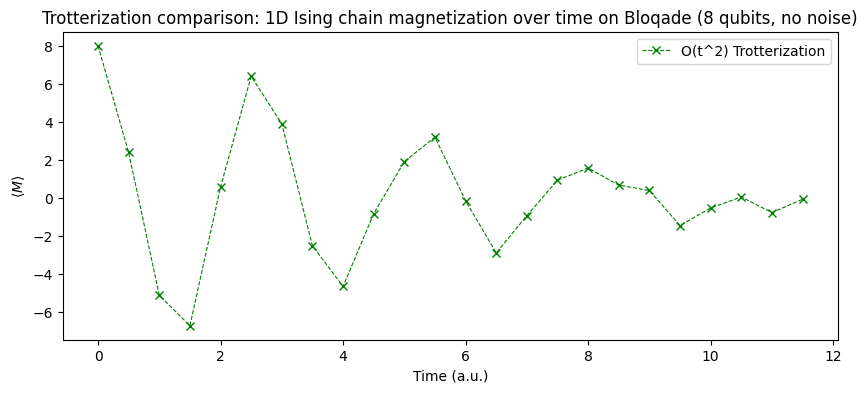

In [ ]:
plt.figure(figsize=(10, 4))
t = np.linspace(0, (steps-1)*time_interval, 24)
plt.plot(t, noNoise8QLie, marker="x", c="green", ls="dashed", lw=0.8, label="O(t^2) Trotterization")
plt.xlabel("Time (a.u.)")
plt.ylabel(r"$\langle M \rangle$")
plt.title("Trotterization comparison: 1D Ising chain magnetization over time on Bloqade (8 qubits, no noise)") 
plt.legend()
